numpy.pi (15 decimals): 3.141592653589793
Mean abs error: 0.012532
Mean rel error: 0.003989


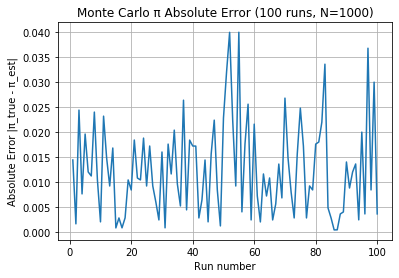

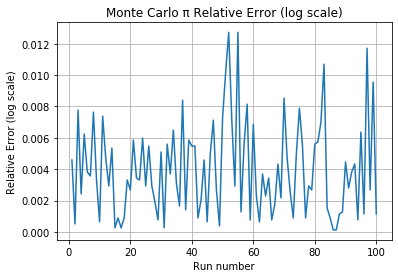

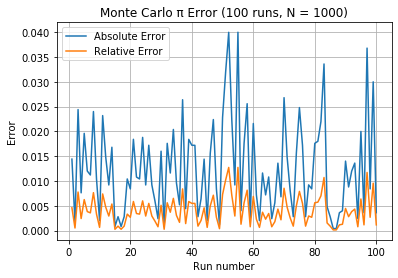

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_pi(n_samples, rng=None):

    if rng is None:
        rng = np.random.default_rng()

    x = rng.random(n_samples)
    y = rng.random(n_samples)
    inside = np.sum(x*x + y*y <= 1.0)
    return 4.0 * inside / n_samples

n_trials = 100
n_samples = 10000

pi_true = np.pi

abs_errors = np.empty(n_trials, dtype=float)
rel_errors = np.empty(n_trials, dtype=float)
pi_estimates = np.empty(n_trials, dtype=float)

rng = np.random.default_rng(67676)  #the funny seed is back haha

for i in range(n_trials):
    est = monte_carlo_pi(n_samples, rng=rng)
    pi_estimates[i] = est

    abs_err = abs(pi_true - est)
    rel_err = abs((pi_true - est) / pi_true)

    abs_errors[i] = abs_err
    rel_errors[i] = rel_err

print(f"numpy.pi (15 decimals): {pi_true:.15f}")
print(f"Mean abs error: {abs_errors.mean():.6f}")
print(f"Mean rel error: {rel_errors.mean():.6f}")

plt.figure()
plt.plot(np.arange(1, n_trials + 1), abs_errors)
plt.xlabel("Run number")
plt.ylabel("Absolute Error |π_true - π_est|")
plt.title("Monte Carlo π Absolute Error (100 runs, N=1000)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1, n_trials + 1), rel_errors)
plt.xlabel("Run number")
plt.ylabel("Relative Error (log scale)")
plt.title("Monte Carlo π Relative Error (log scale)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1, n_trials + 1), abs_errors, label="Absolute Error")
plt.plot(np.arange(1, n_trials + 1), rel_errors, label="Relative Error")
plt.xlabel("Run number")
plt.ylabel("Error")
plt.title("Monte Carlo Relat")
plt.legend()
plt.grid(True)
plt.show()
